In [111]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
%matplotlib inline
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer
#from sklearn.cross_validation import train_test_split

In [112]:
# get excel file
current_dir = Path.cwd()
file = pd.ExcelFile(current_dir / 'County_Training_Test_Normalized_2.xlsx')

# convert to dataframe
df = file.parse("Training Data")

# get dataset
dataset = df.to_numpy()
# print(dataset)

# get features for datapoints
X = np.delete(dataset, [0,1,7,8], axis=1)
X = X.astype(float)
num_features = X.shape[1]
# print(num_features)
# print(X)

# get labels
# Y = dataset[:,[6]]
Y = dataset[:,[8]]
Y = Y.astype(float)
Y = Y.ravel()
# print(Y)

# get counties
counties = dataset[:,[1]]

# get feature names
new_df = df.drop("County", axis=1)
new_df = new_df.drop("States", axis=1)
new_df = new_df.drop("Percentage Voter Turnout", axis=1)
new_df = new_df.drop("Labels", axis=1)
feature_names = list(new_df.columns.values)

print(feature_names)





['No Voters per Polling Location', 'No Religious Congregations', 'Area per Polling Location', 'Percent Broadband Coverage', 'Purge Rate']


In [113]:
# print(X.shape)
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
# X_train.shape

In [114]:
# perform PCA to reduce to 2 dimensions
pca = sklearnPCA(n_components=2) #2-dimensional PCA
features = pca.fit_transform(X)
feat_test = pca.fit_transform(X_test)

# lda = sklearnLDA(n_components=2) #2-dimensional PCA
# features = pca.fit_transform(X)
# feat_test = pca.fit_transform(X_test)

le = preprocessing.LabelEncoder()
encoded_Y = le.fit_transform(Y)

clf = svm.SVC(gamma='scale')
# clf = svm.LinearSVC()
clf.fit(features, encoded_Y) 
# clf.fit(X,encoded_Y)

# print(clf.predict(feat_test))
# clf.predict(X_test)



# print("predicted")
# print(le.inverse_transform(clf.predict(feat_test)))
# print(le.inverse_transform(clf.predict(X_test)))
# print("ground truth")
# print(Y_test)
print(Y_test.shape)
print(Y_test[le.inverse_transform(clf.predict(feat_test))==Y_test].shape)

# le.classes_
# print(le.fit_transform(Y_test))


(263,)
(138,)


In [115]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
#     print(X.shape)
#     print(Y.shape)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
#     print(xy.shape)
    P = clf.decision_function(xy).reshape(X.shape)
#     P = clf.decision_function(xy)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

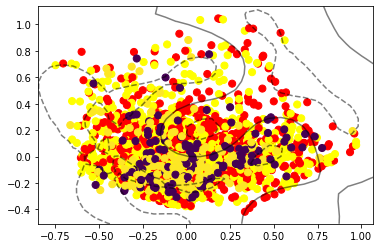

In [116]:
plt.scatter(features[:, 0], features[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);
plt.scatter(feat_test[:, 0], feat_test[:, 1], c=Y_test, s=50)